# Convolution in image processing

#### Topics:
* Convolution with simple FIR filters
* Image filtering basics

#### Learning goals:
* Gain a better understanding of what convolution is
* Be able to interpret convolution results, and handle the change in signal length appropriately

#### Python modules and notebook config:



In [2]:
from numpy import sin, cos, pi, exp, empty, mean, abs, angle # Sentrale matematiske funksjoner
import numpy as np                          # Importer funksjonalitet fra numpy biblioteket med prefiks "np"
import scipy.signal as sig                  # Importerer signalbehandlingsmodulen til scipy
import matplotlib.pyplot as plt             # Importer pyplot modulen i matplotlib med prefiks "plt"

%matplotlib inline

### Introduction

One area where convolution is widely used is in image processing. Applications could be edge detection, de-blurring, noise removal etc. While the image processing terminology is [*kernel*](https://en.wikipedia.org/wiki/Kernel_(image_processing)) and not FIR filter, the underlying principle is largely the same. 

One obvious area where images differ from the types of signals we have worked with thus far, is in being 2-dimensional. Since the main goal of this exercise is to familiarize ourselves with convolution in 1 dimention, we will simplify things by exploring filtering techniques which process only individual rows/columns of pixels independently as if they were separate finite-length 1-dimensional signals. 

Below is a code cell which loads a grayscale image, extracts the pixel values for the 100th pixel row, and plots this as a 1D signal. Such a plot is often referred to as an [intensity profile](https://se.mathworks.com/help/images/intensity-profile-of-images.html).

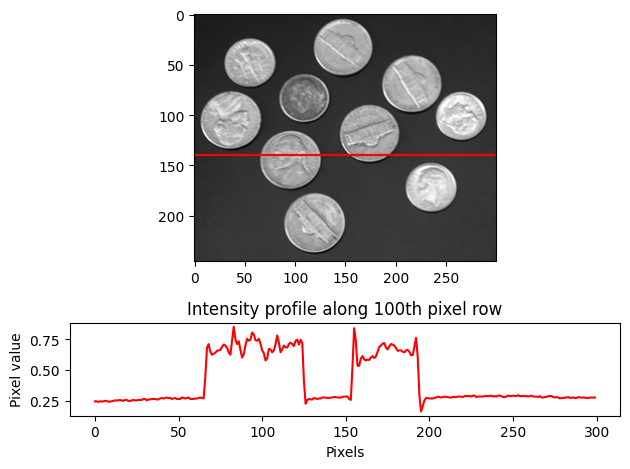

In [3]:
import matplotlib.pyplot as plt
import numpy as np

Im = plt.imread("data/coins.png")
intensity_profile = Im[140,:]

plt.figure()
plt.subplot(3,1,(1,2))
plt.imshow(Im, cmap="gray")
rows, cols = Im.shape
plt.plot([0, cols-1], [140, 140], 'r')

plt.subplot(3,1,3)
plt.plot(intensity_profile, 'r')
plt.title("Intensity profile along 100th pixel row")
plt.xlabel('Pixels')
plt.ylabel('Pixel value')
plt.tight_layout()

For the most part of this task we will work with the intensity profile shown in the figure above, and once we have familiarized ourselves with how filtering works on this 1-dimensional signal, we can combine multiple filtered profiles into a filtered image. For now, let's treat the intensity profile as a generic discrete-time signal $x[n]$ where the sample number $n$ now refers to horisontal position in the image rather than sampling instant.

### First order difference filter

When detecting edges in images, we wish to highlight the areas of a image where the pixel value is subject to sudden change (feature enhancement). The simplest way to do this is to apply a first-order difference FIR filter:

$$y[n] = x[n] -x[n-1] \tag{1}$$

## a)
Determine the filter coefficients $b_0$ and $b_1$ of the filter in equation $1$, as well as the impulse response $h[n]$

In [6]:
b_0 = "1"  # Replace string with numerical value
b_1 = "-1"  # Replace string with numerical value
h = ["1", "-1"] # Replace strings in list with numerical values
# WRITE YOUR CODE IN THIS CELL:

In [7]:
from hashlib import sha1
assert sha1(str(round(float(b_0), 0)).encode('utf-8')+b'e585b').hexdigest() == '072154719495af975efcaa04059edad3b40ee014', 'Wrong answer for b_0 :('
print('Correct answer for b_0 :)')
assert sha1(str(round(float(b_1), 0)).encode('utf-8')+b'35160').hexdigest() == '6667f8864f438cab50f87068b9f50c9d8e1a647c', 'Wrong answer for b_1 :('
print('Correct answer for b_1 :)')
assert sha1(','.join([str(round(float(x), 0)) for x in h]).encode('utf-8')+b'87e72').hexdigest() == '8eb57fe1616647aa38692ced9f7a2a20153826f5', 'Wrong answer for h :('
print('Correct answer for h :)')

Correct answer for b_0 :)
Correct answer for b_1 :)
Correct answer for h :)


## b)
Use the function [`convolve`](https://numpy.org/doc/2.0/reference/generated/numpy.convolve.html) in the `numpy`-module to filter the intensity profile ($x[n]$) with the filter described in equation $1$ by using the impulse response from **a)**. Create a plot showing the filtere output (let's clal it $y_d[n]$).

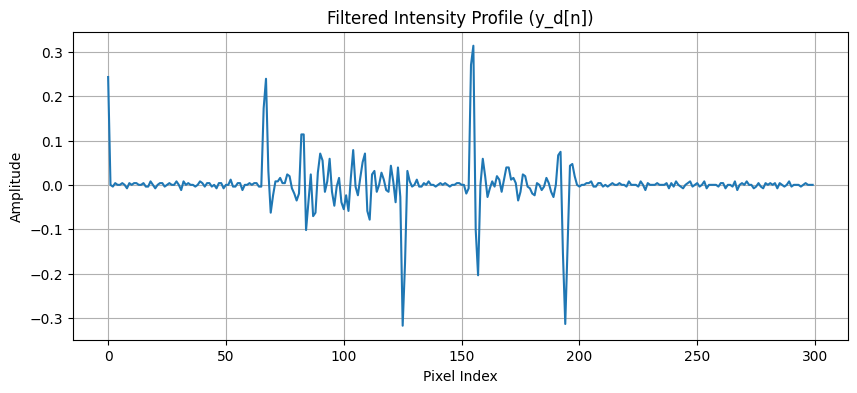

In [9]:
h = [1, -1] 

y_d = np.convolve(intensity_profile, h, mode='same')

plt.figure(figsize=(10, 4))
plt.plot(y_d)
plt.title("Filtered Intensity Profile (y_d[n])")
plt.xlabel('Pixel Index')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

*[here](Figurer/task1b_lf.png)* is an image showing what the filtered profile should look like. As we can see, the most prominent spikes (in both positive and negative direction) line up quite well with the transitions between background and coin.

## c) 

Why do you think there is a large positive spike in the start of the filtered intensity profile, and a large negative spike at the end?

ANSWER THEORY QUESTIONS HERE:

### Signal smoothing and Moving Average Filters

While difference filtering intensity profiles may highlight edges of objects, it may also highlight small localized image details or simple noise. To avoid this, it may be advantageous to combine the difference filter with a smoothing filter (a.k.a. lowpass filter). One of the simplest lowpass FIR filters is the Moving Average filter which calculates the average value of the $M$ most recent signal samples:

$$y[n] = \frac{1}{M} \sum_{k=0}^{M-1} x[n-k] \tag{2}$$

## d)

Use a 4-point moving average filter to conduct smoothing of the intensity profile $x[n]$, and plot the smoothed profile (let's call it $y_s[n]$) alongside the original.

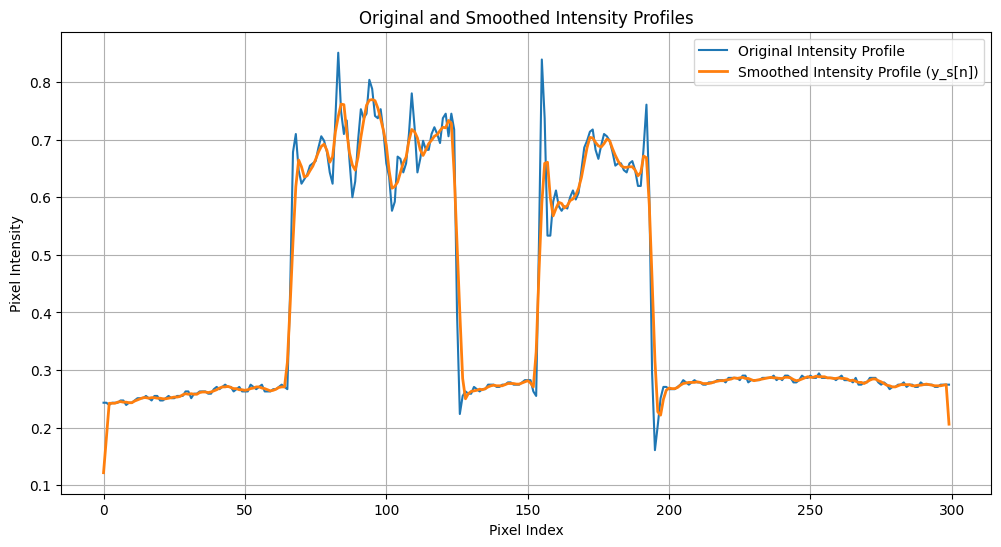

In [10]:
# WRITE YOUR CODE IN THIS CELL:
h_s = np.ones(4)/4
y_s = np.convolve(intensity_profile, h_s, mode='same')

plt.figure(figsize=(12, 6))
plt.plot(intensity_profile, label='Original Intensity Profile')
plt.plot(y_s, label='Smoothed Intensity Profile (y_s[n])', linewidth=2)
plt.title('Original and Smoothed Intensity Profiles')
plt.xlabel('Pixel Index')
plt.ylabel('Pixel Intensity')
plt.legend()
plt.grid(True)
plt.show()

*[here](Figurer/task1d_lf.png)* is an image showing what the two plots should look like.
## e) 

Explain why the smoothed profile appears to "lag behind" the original.

ANSWER THEORY QUESTIONS HERE:

### Cascade FIR filters

The process of smoothing the intensity profile $x[n]$ using a moving average filter $h_{s}[n]$ before highlighting edges with a difference filter $h_d[n]$ can be described mathematically as follows:
$$y[n] = (x[n]*h_s[n])*h_d[n]$$

Since convolution is associative this can be simplified into one filtering operation $y[n] = x[n]*h[n]$ where $h[n] = h_s[n]*h_d[n]$.

## f)

Using the filters from problems **a)** and **d)**, what is the impulse response of the combined smoothing & difference filter $h[n]$?

In [13]:
h = np.convolve(h_s, h) # Replace string with appropriate collection of numerical values
print(h)
# WRITE YOUR CODE IN THIS CELL:

[ 0.0625  0.0625  0.0625  0.0625 -0.0625 -0.0625 -0.0625 -0.0625]


In [12]:
from hashlib import sha1
assert sha1(','.join([str(round(float(x), 0)) for x in h]).encode('utf-8')+b'652c3').hexdigest() == 'a96eaae5cfb11450eda1c177f62eb3b1c58dd4df', 'Wrong answer for h :('
print('Correct answer for h :)')

Correct answer for h :)


It is now time to put our edge highlighting filter to the test, and filter the actual image. To do this, we need to convert the impulse response to a 2D array, and use the `scipy.signal`-function `convolve2d`. The code cell below will effectively filter each line of pixels individually, and combine all the filtered lines to a new image. Assuming we don't wish to differentiate between rising edge and falling edge, plotting the absolute values of the filtered image $\boldsymbol{Y}_h$ should highlight edges in the *horizontal direction*.


In [ ]:
import scipy.signal as sig
h_2D = h.reshape(1, -1) # 2D array with 1 row, and as many columns as necessary
Im_filt_h = sig.convolve2d(Im, h_2D, mode="same")  # Truncate the output so output size = input size
plt.imshow(np.abs(Im_filt_h), cmap="gray")  # Plot the magnitude of filter output

## g) edge detection *optional*

1. Modify the code snippet above to produce *another* filtered image $\boldsymbol{Y}_v$ which highlights *vertical* edges.
2. Combine the verticaly filtered image $\boldsymbol{Y}_v$ and the horizontally filtered image $\boldsymbol{Y}_h$ to produce the output $\boldsymbol{Y}[i,j] = \sqrt{\boldsymbol{Y}_h[i,j]^2 + \boldsymbol{Y}_v[i,j]^2}$, and display this image using `imshow`.
3. Finally, create a [binary image](https://en.wikipedia.org/wiki/Binary_image) by [thresholding](https://en.wikipedia.org/wiki/Thresholding_(image_processing)) the image from step 2. You are free to choose a sutable threshold value yourself. [here]("Figurer/task1g_lf.png") is an example of what the final binarized result may look like.

In [ ]:
# WRITE YOUR CODE IN THIS CELL:

### *Disclaimer*

The edge detection method discussed in this task is a *simplified* variant of more commonly used edge detection techniques. In practice, edge highlighting filters (aka. kernels) will utilize information along both dimensions in an image, and take the form of a matrix rather than an array. However, the concept of combining smoothing with edge highlighting is familiar in feature enhancement filters such as [DoG](https://en.wikipedia.org/wiki/Difference_of_Gaussians).